In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline


In [41]:
df = pd.read_csv('district wise centroids.csv')
df

,State,District,Latitude,Longitude
0,Andaman and Nicobar,Andaman Islands,12.382571,92.822911
1,Andaman and Nicobar,Nicobar Islands,7.835291,93.511601
2,Andhra Pradesh,Adilabad,19.284514,78.813212
3,Andhra Pradesh,Anantapur,14.312066,77.460158
4,Andhra Pradesh,Chittoor,13.331093,78.927639
...,...,...,...,...
589,West Bengal,North 24 Parganas,22.062388,88.877940
590,West Bengal,Puruliya,23.254192,86.396853
591,West Bengal,South 24 Parganas,21.854428,88.445370
592,West Bengal,Uttar Dinajpur,26.044619,88.235952


In [42]:
df.head()

,State,District,Latitude,Longitude
0,Andaman and Nicobar,Andaman Islands,12.382571,92.822911
1,Andaman and Nicobar,Nicobar Islands,7.835291,93.511601
2,Andhra Pradesh,Adilabad,19.284514,78.813212
3,Andhra Pradesh,Anantapur,14.312066,77.460158
4,Andhra Pradesh,Chittoor,13.331093,78.927639


In [43]:
df.count()

State        594
District     594
Latitude     594
Longitude    594
dtype: int64

In [44]:
for i in list(df):
    
    # show the list of values  
    print(df[i].tolist())

['Andaman and Nicobar', 'Andaman and Nicobar', 'Andhra Pradesh', 'Andhra Pradesh', 'Andhra Pradesh', 'Andhra Pradesh', 'Andhra Pradesh', 'Andhra Pradesh', 'Andhra Pradesh', 'Andhra Pradesh', 'Andhra Pradesh', 'Andhra Pradesh', 'Andhra Pradesh', 'Andhra Pradesh', 'Andhra Pradesh', 'Andhra Pradesh', 'Andhra Pradesh', 'Andhra Pradesh', 'Andhra Pradesh', 'Andhra Pradesh', 'Andhra Pradesh', 'Andhra Pradesh', 'Andhra Pradesh', 'Andhra Pradesh', 'Andhra Pradesh', 'Arunachal Pradesh', 'Arunachal Pradesh', 'Arunachal Pradesh', 'Arunachal Pradesh', 'Arunachal Pradesh', 'Arunachal Pradesh', 'Arunachal Pradesh', 'Arunachal Pradesh', 'Arunachal Pradesh', 'Arunachal Pradesh', 'Arunachal Pradesh', 'Arunachal Pradesh', 'Arunachal Pradesh', 'Arunachal Pradesh', 'Arunachal Pradesh', 'Assam', 'Assam', 'Assam', 'Assam', 'Assam', 'Assam', 'Assam', 'Assam', 'Assam', 'Assam', 'Assam', 'Assam', 'Assam', 'Assam', 'Assam', 'Assam', 'Assam', 'Assam', 'Assam', 'Assam', 'Assam', 'Assam', 'Assam', 'Bihar', 'Bihar',

In [45]:
df2=df.drop("State",axis=1)
df2

,District,Latitude,Longitude
0,Andaman Islands,12.382571,92.822911
1,Nicobar Islands,7.835291,93.511601
2,Adilabad,19.284514,78.813212
3,Anantapur,14.312066,77.460158
4,Chittoor,13.331093,78.927639
...,...,...,...
589,North 24 Parganas,22.062388,88.877940
590,Puruliya,23.254192,86.396853
591,South 24 Parganas,21.854428,88.445370
592,Uttar Dinajpur,26.044619,88.235952


In [46]:
data_with_index = df.set_index("State")
data_with_index = data_with_index.drop(["Andhra Pradesh", "Andaman and Nicobar","Arunachal Pradesh","Bihar","Chandigarh","Chhattisgarh","Dadra and Nagar Haveli","Daman and Diu","Delhi","Goa","Haryana","Himachal Pradesh","Jharkhand","Karnataka","Kerala","Lakshadweep","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Orissa","Puducherry","Punjab","Rajasthan","Sikkim","Tripura","Uttar Pradesh","Uttaranchal","West Bengal"])
data_with_index

,District,Latitude,Longitude
State,,,
Assam,Barpeta,26.427872,90.979120
Assam,Bongaigaon,26.450125,90.673430
Assam,Cachar,24.815571,92.868497
Assam,Darrang,26.584632,92.041413
Assam,Dhemaji,27.586533,94.713369
...,...,...,...
Tamil Nadu,Tirunelveli Kattabo,8.457431,77.705496
Tamil Nadu,Tiruvannamalai,12.419319,79.232656
Tamil Nadu,Vellore,12.784883,79.026433


In [47]:
df2=data_with_index.drop(labels="District", axis=1)
df2

,Latitude,Longitude
State,,
Assam,26.427872,90.979120
Assam,26.450125,90.673430
Assam,24.815571,92.868497
Assam,26.584632,92.041413
Assam,27.586533,94.713369
...,...,...
Tamil Nadu,8.457431,77.705496
Tamil Nadu,12.419319,79.232656
Tamil Nadu,12.784883,79.026433


In [48]:
df2

,Latitude,Longitude
State,,
Assam,26.427872,90.979120
Assam,26.450125,90.673430
Assam,24.815571,92.868497
Assam,26.584632,92.041413
Assam,27.586533,94.713369
...,...,...
Tamil Nadu,8.457431,77.705496
Tamil Nadu,12.419319,79.232656
Tamil Nadu,12.784883,79.026433


In [49]:
arr = df2.to_numpy()
arr

array([[26.42787226, 90.9791201 ],
       [26.45012522, 90.67342962],
       [24.81557067, 92.8684965 ],
       [26.58463216, 92.04141338],
       [27.58653344, 94.71336909],
       [26.04506148, 89.98500822],
       [27.30612284, 95.09982823],
       [26.01727778, 90.59869892],
       [26.37721971, 93.82583398],
       [24.45749609, 92.59154665],
       [26.76244824, 94.30197723],
       [26.17093945, 91.58863274],
       [26.08966455, 93.1153657 ],
       [24.69660712, 92.36794986],
       [26.49724664, 90.13997471],
       [27.14128806, 94.07759493],
       [26.24650047, 92.21949953],
       [26.26462171, 92.93061911],
       [26.46323768, 91.40598521],
       [25.33829985, 92.97740206],
       [27.0276287 , 94.90025848],
       [26.73514927, 92.85197805],
       [27.53549291, 95.69055949],
       [22.60542556, 72.23898136],
       [21.04832649, 71.43457638],
       [22.28271821, 72.57782052],
       [24.25853897, 71.93205253],
       [21.75787276, 72.67326347],
       [21.7021939 ,

In [50]:
len(arr)

92

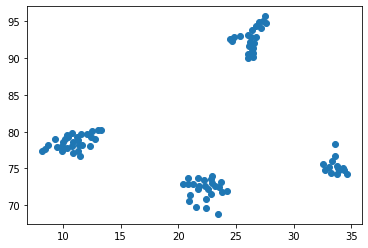

In [51]:
plt.scatter(arr[:,0], arr[:,1])

In [52]:
Kmean = KMeans(n_clusters=33)
Kmean.fit(arr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=33, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [53]:
z=Kmean.cluster_centers_
z

array([[26.36632744, 91.81388272],
       [22.71283471, 73.53117143],
       [10.83715922, 78.14028703],
       [33.9725153 , 75.14111209],
       [26.76031867, 94.06846871],
       [22.61637693, 71.1601909 ],
       [13.1669785 , 80.23931927],
       [33.46280479, 76.35419518],
       [20.85565645, 72.90386478],
       [25.33829985, 92.97740206],
       [ 8.45395272, 77.7214513 ],
       [10.41915066, 79.44288342],
       [26.28751668, 90.47524631],
       [23.48035706, 72.75468555],
       [12.04595637, 79.80270609],
       [11.1935836 , 77.0526659 ],
       [23.48057203, 68.82192301],
       [27.36394447, 95.10100382],
       [ 9.7657509 , 77.77488779],
       [33.5857922 , 78.30725928],
       [33.99532658, 74.49623156],
       [32.7595742 , 75.19654518],
       [22.08705261, 72.41319792],
       [21.98076197, 69.66979497],
       [26.36314517, 92.96598762],
       [ 9.63658827, 78.77860546],
       [11.9647327 , 78.18146197],
       [24.65655796, 92.609331  ],
       [20.98892475,

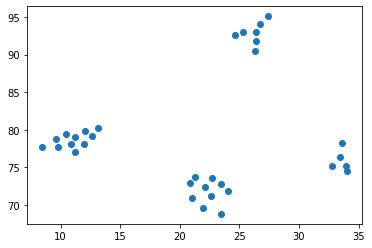

In [54]:
plt.scatter(z[:,0], z[:,1])

In [55]:
len(z)

33

In [56]:
BBox = ((df.Longitude.min(),   df.Longitude.max(),      
         df.Latitude.min(), df.Latitude.max()))

In [57]:
BBox

(68.82192301497915, 96.59670770547943, 7.835290749774195, 34.59923473684211)

In [58]:
mymap = plt.imread('map')

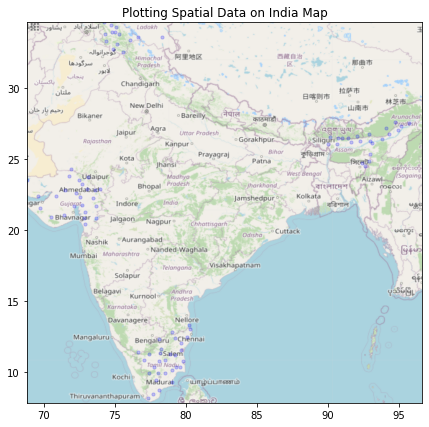

In [60]:
ig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df2.Longitude, df2.Latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on India Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mymap, zorder=0, extent = BBox, aspect= 'equal')

In [61]:
zdf = pd.DataFrame(z) 


In [62]:
zdf

,0,1
0,26.366327,91.813883
1,22.712835,73.531171
2,10.837159,78.140287
3,33.972515,75.141112
4,26.760319,94.068469
5,22.616377,71.160191
6,13.166979,80.239319
7,33.462805,76.354195
8,20.855656,72.903865
9,25.338300,92.977402


In [63]:
zdf.rename(columns = {0: 'l1', 1: 'l2'}, inplace = True)
zdf.count()

l1    33
l2    33
dtype: int64

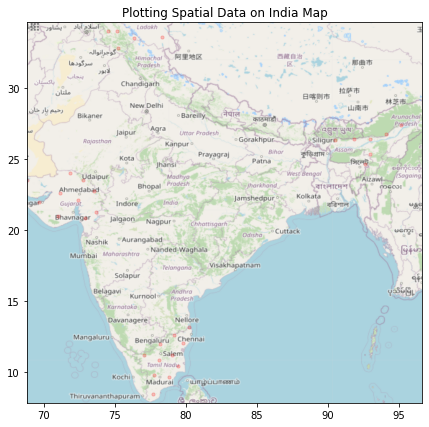

In [64]:
ig, ax = plt.subplots(figsize = (8,7))
ax.scatter(zdf.l2, zdf.l1, zorder=1, alpha= 0.2, c='r', s=10)
ax.set_title('Plotting Spatial Data on India Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mymap, zorder=0, extent = BBox, aspect= 'equal')

In [65]:
zdf

,l1,l2
0,26.366327,91.813883
1,22.712835,73.531171
2,10.837159,78.140287
3,33.972515,75.141112
4,26.760319,94.068469
5,22.616377,71.160191
6,13.166979,80.239319
7,33.462805,76.354195
8,20.855656,72.903865
9,25.338300,92.977402


In [67]:
df2.head()

,Latitude,Longitude
State,,
Assam,26.427872,90.979120
Assam,26.450125,90.673430
Assam,24.815571,92.868497
Assam,26.584632,92.041413
Assam,27.586533,94.713369
